In [53]:
CONSUMER_KEY = "MMqMguDZmmZ3LNp7SXITCTgXp"
CONSUMER_SECRET = "MJBG4Eu6pLkY2f2nYSFg9T4LFsBxH6TxMLYaZ8uNuKIsBK1yCL"
ACCESS_TOKEN  = "3151860468-2JAkODoQeY9Q36T7RdAd3paIhyYnRWyEqOzRM0S"
ACCESS_TOKEN_SECRET = "tdDC4oSU1QJFwDgOxbAlB4rNcYR2NOlwTtq43kuddjqNg"

In [54]:
import numpy as np
import pandas as pd

In [55]:
from tweepy import API 
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

In [56]:
from tweepy import API 
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
 
##import twitter_credentials
import numpy as np
import pandas as pd


# # # # TWITTER CLIENT # # # #
class TwitterClient():
    def __init__(self, twitter_user=None):
        self.auth = TwitterAuthenticator().authenticate_twitter_app()
        self.twitter_client = API(self.auth)

        self.twitter_user = twitter_user

    def get_twitter_client_api(self):
        return self.twitter_client

    def get_user_timeline_tweets(self, num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline, id=self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets

    def get_friend_list(self, num_friends):
        friend_list = []
        for friend in Cursor(self.twitter_client.friends, id=self.twitter_user).items(num_friends):
            friend_list.append(friend)
        return friend_list

    def get_home_timeline_tweets(self, num_tweets):
        home_timeline_tweets = []
        for tweet in Cursor(self.twitter_client.home_timeline, id=self.twitter_user).items(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets


# # # # TWITTER AUTHENTICATER # # # #
class TwitterAuthenticator():

    def authenticate_twitter_app(self):
        auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
        auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
        return auth

# # # # TWITTER STREAMER # # # #
class TwitterStreamer():
    """
    Class for streaming and processing live tweets.
    """
    def __init__(self):
        self.twitter_autenticator = TwitterAuthenticator()    

    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        # This handles Twitter authetification and the connection to Twitter Streaming API
        listener = TwitterListener(fetched_tweets_filename)
        auth = self.twitter_autenticator.authenticate_twitter_app() 
        stream = Stream(auth, listener)

        # This line filter Twitter Streams to capture data by the keywords: 
        stream.filter(track=hash_tag_list)


# # # # TWITTER STREAM LISTENER # # # #
class TwitterListener(StreamListener):
    """
    This is a basic listener that just prints received tweets to stdout.
    """
    def __init__(self, fetched_tweets_filename):
        self.fetched_tweets_filename = fetched_tweets_filename

    def on_data(self, data):
        try:
            print(data)
            with open(self.fetched_tweets_filename, 'a') as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print("Error on_data %s" % str(e))
        return True
          
    def on_error(self, status):
        if status == 420:
            # Returning False on_data method in case rate limit occurs.
            return False
        print(status)


class TweetAnalyzer():
    """
    Functionality for analyzing and categorizing content from tweets.
    """
    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

        df['id'] = np.array([tweet.id for tweet in tweets])
        df['len'] = np.array([len(tweet.text) for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        df['source'] = np.array([tweet.source for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])

        return df

 
if __name__ == '__main__':

    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()

    api = twitter_client.get_twitter_client_api()

    tweets = api.user_timeline(screen_name="Hyundai", count=200)

    #print(dir(tweets[0]))
    #print(tweets[0].retweet_count)

    df = tweet_analyzer.tweets_to_data_frame(tweets)
    
    print(df.head(10))

                                              Tweets                   id  \
0  @gman0907 We are very sorry to hear about this...  1436436560577286146   
1  @jascreates1 That's awesome, Jasmine 👏 Do you ...  1436410872298045442   
2  @yana_wanna Let's get started 🙌 What kind of f...  1436410364149698563   
3              @allentmartin https://t.co/g0ugPAa1w9  1436408554605350912   
4                  @KurtisQuillin Mission complete 😎  1436401278792335363   
5  @wheelsee Our Santa Fe PHEV should be rolling ...  1436400630642319361   
6  @PVDMVP Now that's impressive, John 🙌 What has...  1436397256379301889   
7  @CBforAZ Please send us a private message with...  1436383780315582468   
8  Hyundai Fan Favorites 🙌\n\nEyes on the prize 🏁...  1436358815507795981   
9  @hpickens131 Please reach out to the number li...  1436335702707478529   

   len                date               source  likes  retweets  
0  139 2021-09-10 21:08:58  Sprinklr Publishing      0         0  
1   77 2021-09-10 

In [57]:
df.tail()


,Tweets,id,len,date,source,likes,retweets
195,Skate the streets of Santa Cruz with members o...,1429473522124984321,140,2021-08-22 16:00:20,Sprinklr Publishing,30,2
196,@mktone28 We are very sorry to hear this. Hyun...,1428830756541960194,140,2021-08-20 21:26:13,Sprinklr Publishing,0,0
197,@Lilith_TIC We are very disappointed to hear t...,1428822151394639872,140,2021-08-20 20:52:01,Sprinklr Publishing,0,0
198,@Vofking The Santa Cruzes arriving in 2022 wil...,1428815882185179136,133,2021-08-20 20:27:07,TweetDeck,0,0
199,"@ChristianEm24 Hello Christian, we're disappoi...",1428804583816667149,140,2021-08-20 19:42:13,Sprinklr Publishing,0,0


In [58]:
xx=df['Tweets']


In [59]:
xx.head()


0    @gman0907 We are very sorry to hear about this...
1    @jascreates1 That's awesome, Jasmine 👏 Do you ...
2    @yana_wanna Let's get started 🙌 What kind of f...
3                @allentmartin https://t.co/g0ugPAa1w9
4                    @KurtisQuillin Mission complete 😎
Name: Tweets, dtype: object

In [60]:
xx.shape


(200,)

In [61]:
voc_size=5000


In [62]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ratnayash
[nltk_data]     Pandey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', df['Tweets'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [64]:
corpus


['gman sorri hear would like advis reach custom care team http co l fqc yde',
 'jascreat awesom jasmin alreadi vehicl mind',
 'yana wanna let get start kind featur look next ride',
 'allentmartin http co g ugpaa w',
 'kurtisquillin mission complet',
 'wheelse santa fe phev roll dealership within next week recommend get http co h gmqtmwpg',
 'pvdmvp impress john favorit adventur hyundai',
 'cbforaz pleas send us privat messag case number look thank reach cc',
 'hyundai fan favorit eye prize velost n sport cred tyler hannah http co gxxqbp',
 'hpicken pleas reach number list assist apolog inconveni cc',
 'today worldevday charg hyundaiioniq electr cuv sustain http co usqyhyiv',
 'kenechian pleas reach custom care team discuss matter corpor rep http co ke pbbni',
 'christo hello christoph thank provid inform see case ass http co dsjqbedxh',
 'tombullington like see kona electr take',
 'drivetimevideo never heard',
 'wcnc fredwcnc congratul mikala thank anim',
 'surapanenivenu hello case ma

In [65]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [66]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[2077,
  2751,
  4556,
  3765,
  2292,
  2110,
  3930,
  4306,
  4206,
  4496,
  1690,
  2726,
  588,
  3189,
  1065],
 [973, 859, 4053, 4643, 149, 2712],
 [4569, 1307, 612, 540, 339, 1812, 4360, 2910, 3113, 1877],
 [4639, 1690, 2726, 582, 2165, 2483],
 [1781, 4607, 3583],
 [3544,
  1627,
  215,
  4223,
  1543,
  2305,
  1236,
  3113,
  3809,
  3096,
  540,
  1690,
  2726,
  3970,
  281],
 [1114, 2864, 1857, 2917, 4700, 3711],
 [1032, 2119, 4715, 2811, 4183, 2704, 384, 4289, 2910, 997, 3930, 3598],
 [3711,
  2813,
  2917,
  1565,
  434,
  1625,
  3438,
  2256,
  4943,
  1641,
  2843,
  1690,
  2726,
  27],
 [2084, 2119, 3930, 4289, 4123, 4542, 1465, 3730, 3598],
 [4408, 1607, 4326, 3279, 2926, 4093, 1967, 1690, 2726, 4197],
 [1905,
  2119,
  3930,
  4306,
  4206,
  4496,
  2914,
  4605,
  473,
  1653,
  1690,
  2726,
  4863,
  1403],
 [2044, 2121, 3782, 997, 4397, 1340, 4391, 384, 2778, 1690, 2726, 1622],
 [4753, 2292, 4391, 3268, 2926, 3557],
 [4137, 4290, 4518],
 [141, 3265, 4678, 1

In [67]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  588 3189 1065]
 [   0    0    0 ... 4643  149 2712]
 [   0    0    0 ... 2910 3113 1877]
 ...
 [   0    0    0 ... 1690 2726 2074]
 [   0    0    0 ... 3873 2586 2282]
 [   0    0    0 ... 4998  840 3042]]


In [68]:
embedded_docs[0]


array([   0,    0,    0,    0,    0, 2077, 2751, 4556, 3765, 2292, 2110,
       3930, 4306, 4206, 4496, 1690, 2726,  588, 3189, 1065])

In [69]:
import numpy as np
X_final=np.array(embedded_docs)

In [70]:

X_final.shape

(200, 20)

In [71]:
from tensorflow.keras.models import save_model, load_model

In [72]:
filepath= './saved_model'

In [73]:
model=load_model(filepath, compile = True)

In [75]:
predctn= model.predict(X_final)


In [76]:
predctn


array([[0.49900252],
       [0.50096214],
       [0.5019368 ],
       [0.5029856 ],
       [0.5041184 ],
       [0.49997434],
       [0.5025477 ],
       [0.50142056],
       [0.50031745],
       [0.49988914],
       [0.5020437 ],
       [0.50162643],
       [0.5020581 ],
       [0.5027947 ],
       [0.5066362 ],
       [0.5025092 ],
       [0.49906066],
       [0.50209755],
       [0.49973163],
       [0.50203013],
       [0.5002943 ],
       [0.49774274],
       [0.502515  ],
       [0.49937883],
       [0.50324374],
       [0.5002325 ],
       [0.4987681 ],
       [0.5002737 ],
       [0.4982615 ],
       [0.49917135],
       [0.49705616],
       [0.50002694],
       [0.5027423 ],
       [0.5011554 ],
       [0.49812153],
       [0.49942872],
       [0.50205994],
       [0.50229895],
       [0.49838987],
       [0.50157034],
       [0.49952444],
       [0.4998265 ],
       [0.5011112 ],
       [0.5010304 ],
       [0.50170064],
       [0.5009446 ],
       [0.5037908 ],
       [0.503

In [77]:
predctn.shape


(200, 1)

In [78]:
gg=np.reshape(predctn,200)


In [79]:
gg1=pd.Series(gg)


In [80]:
new_df=pd.DataFrame(columns=['Tweet','Sentiment'])


In [81]:
new_df['Tweet']=df['Tweets']


In [82]:
new_df['Sentiment']=gg1


In [83]:
new_df


,Tweet,Sentiment
0,@gman0907 We are very sorry to hear about this...,0.499003
1,"@jascreates1 That's awesome, Jasmine 👏 Do you ...",0.500962
2,@yana_wanna Let's get started 🙌 What kind of f...,0.501937
3,@allentmartin https://t.co/g0ugPAa1w9,0.502986
4,@KurtisQuillin Mission complete 😎,0.504118
...,...,...
195,Skate the streets of Santa Cruz with members o...,0.499587
196,@mktone28 We are very sorry to hear this. Hyun...,0.501217
197,@Lilith_TIC We are very disappointed to hear t...,0.500442
198,@Vofking The Santa Cruzes arriving in 2022 wil...,0.500228


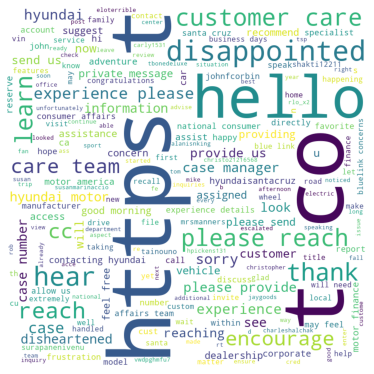

In [84]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in new_df.Tweet: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords =stopwords , 
                min_font_size = 10).generate(comment_words) 
,  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [85]:
new_df1=pd.DataFrame(columns=['Tweet','Sentiment','length','date','likes','retweets'])


In [86]:
new_df1['Tweet']=new_df['Tweet']
new_df1['Sentiment']=new_df['Sentiment']
new_df1['length']=df['len']
new_df1['date']=df['date']
new_df1['likes']=df['likes']
new_df1['retweets']=df['retweets']

In [87]:
new_df1


,Tweet,Sentiment,length,date,likes,retweets
0,@gman0907 We are very sorry to hear about this...,0.499003,139,2021-09-10 21:08:58,0,0
1,"@jascreates1 That's awesome, Jasmine 👏 Do you ...",0.500962,77,2021-09-10 19:26:53,1,0
2,@yana_wanna Let's get started 🙌 What kind of f...,0.501937,92,2021-09-10 19:24:52,0,0
3,@allentmartin https://t.co/g0ugPAa1w9,0.502986,37,2021-09-10 19:17:41,0,0
4,@KurtisQuillin Mission complete 😎,0.504118,33,2021-09-10 18:48:46,0,0
...,...,...,...,...,...,...
195,Skate the streets of Santa Cruz with members o...,0.499587,140,2021-08-22 16:00:20,30,2
196,@mktone28 We are very sorry to hear this. Hyun...,0.501217,140,2021-08-20 21:26:13,0,0
197,@Lilith_TIC We are very disappointed to hear t...,0.500442,140,2021-08-20 20:52:01,0,0
198,@Vofking The Santa Cruzes arriving in 2022 wil...,0.500228,133,2021-08-20 20:27:07,0,0


In [88]:
new_df1.dtypes

Tweet                object
Sentiment           float32
length                int32
date         datetime64[ns]
likes                 int32
retweets              int32
dtype: object

In [107]:
def Seg(x):
    if x < 0.5:
       return 'Sad'
    elif x == 0.5:
       return 'Neutral'
    else:
       return 'Happy'

new_df['Sentiment'].apply(Seg)

0        Sad
1      Happy
2      Happy
3      Happy
4      Happy
       ...  
195      Sad
196    Happy
197    Happy
198    Happy
199    Happy
Name: Sentiment, Length: 200, dtype: object

In [108]:
new_df

,Tweet,Sentiment,Final_Sentiment
0,@gman0907 We are very sorry to hear about this...,0.499003,Sad
1,"@jascreates1 That's awesome, Jasmine 👏 Do you ...",0.500962,Happy
2,@yana_wanna Let's get started 🙌 What kind of f...,0.501937,Happy
3,@allentmartin https://t.co/g0ugPAa1w9,0.502986,Happy
4,@KurtisQuillin Mission complete 😎,0.504118,Happy
...,...,...,...
195,Skate the streets of Santa Cruz with members o...,0.499587,Sad
196,@mktone28 We are very sorry to hear this. Hyun...,0.501217,Happy
197,@Lilith_TIC We are very disappointed to hear t...,0.500442,Happy
198,@Vofking The Santa Cruzes arriving in 2022 wil...,0.500228,Happy


In [114]:
time = new_df.to_csv()
print('\nCSV String Values:\n', time) 




CSV String Values:
 ,Tweet,Sentiment,Final_Sentiment
0,@gman0907 We are very sorry to hear about this. We would like to advise you to reach out to our customer care team… https://t.co/6l5fqc7yde,0.49900252,Sad
1,"@jascreates1 That's awesome, Jasmine 👏 Do you already have a vehicle in mind?",0.50096214,Happy
2,@yana_wanna Let's get started 🙌 What kind of features are you looking for in your next ride?,0.5019368,Happy
3,@allentmartin https://t.co/g0ugPAa1w9,0.5029856,Happy
4,@KurtisQuillin Mission complete 😎,0.5041184,Happy
5,@wheelsee Our Santa Fe PHEV should be rolling out to dealerships within the next few weeks 😎 We recommend getting i… https://t.co/H5GmqTMwPg,0.49997434,Sad
6,"@PVDMVP Now that's impressive, John 🙌 What has been your favorite adventure with your Hyundai?",0.5025477,Happy
7,"@CBforAZ Please send us a private message with your case number, and we will look into it for you. Thank you for reaching out. ^cc",0.50142056,Happy
8,"Hyundai Fan Favorites 🙌

Eyes on the prize 